# Interactive Map: A Visual Introduction to OOP

This Jupyter notebook introduces Object-Oriented Programming (OOP) through a simple visual map application. We'll build a program that displays a map image with a movable marker, demonstrating fundamental OOP concepts in a way that's easy to understand and experiment with.

## 1. Introduction to OOP

Object-Oriented Programming is a programming paradigm that organizes code around "objects" - entities that contain both data (attributes) and code (methods). This approach helps us model real-world systems and create more maintainable, reusable code.

In this notebook, we'll create three classes:
1. **GameMap** - Handles the background map image
2. **Marker** - Represents the movable marker on the map
3. **MapApp** - Brings everything together into an interactive application

## 2. Setting Up Our Environment

First, let's import the libraries we need:

In [4]:
import tkinter as tk
from PIL import Image, ImageTk, ImageDraw
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from ipywidgets import Button, HBox, VBox, Output
import random

## 3. The GameMap Class

Our first class represents the map itself. This class demonstrates several core OOP concepts:
- Class definition (blueprint for objects)
- Constructor method (`__init__`)
- Instance attributes (data unique to each object)
- Instance methods (functions that operate on the object's data)

In [5]:
class GameMap:
    """
    The GameMap class represents a visual map that can be displayed.
    It handles loading the background image and keeping track of map dimensions.
    """
    
    def __init__(self, image_path, width=800, height=600):
        """
        Initialize a new map with the given background image.
        
        Args:
            image_path: Path to the background image file
            width: Width to display the image (default 800)
            height: Height to display the image (default 600)
        """
        # Store the map dimensions
        self.width = width
        self.height = height
        
        # Store the image path for later use
        self.image_path = image_path
        
        # Load the image (we'll resize it when displaying)
        self.load_image()
    
    def load_image(self):
        """Load the map's background image from the file."""
        try:
            # Check if the image file exists
            if not os.path.exists(self.image_path):
                raise FileNotFoundError(f"Map image not found: {self.image_path}")
            
            # PIL is used to open and resize the image
            self.original_image = Image.open(self.image_path)
            
            # Get the actual dimensions of the original image
            self.original_width, self.original_height = self.original_image.size
            
        except Exception as e:
            print(f"Error loading map image: {e}")
            # Create a blank image as a fallback
            self.original_image = Image.new('RGB', (self.width, self.height), color='lightgray')
            self.original_width, self.original_height = self.width, self.height
    
    def is_valid_position(self, x, y):
        """
        Check if a position is valid (within the map boundaries).
        
        Args:
            x: X coordinate to check
            y: Y coordinate to check
            
        Returns:
            True if the position is valid, False otherwise
        """
        return 0 <= x < self.width and 0 <= y < self.height
    
    def display(self):
        """Display the map image using matplotlib."""
        plt.figure(figsize=(10, 8))
        plt.imshow(self.original_image)
        plt.axis('off')
        plt.title("Game Map")
        plt.show()

Let's create an instance of our GameMap class and display it. If you don't have an image file available, we'll create a simple demo map:

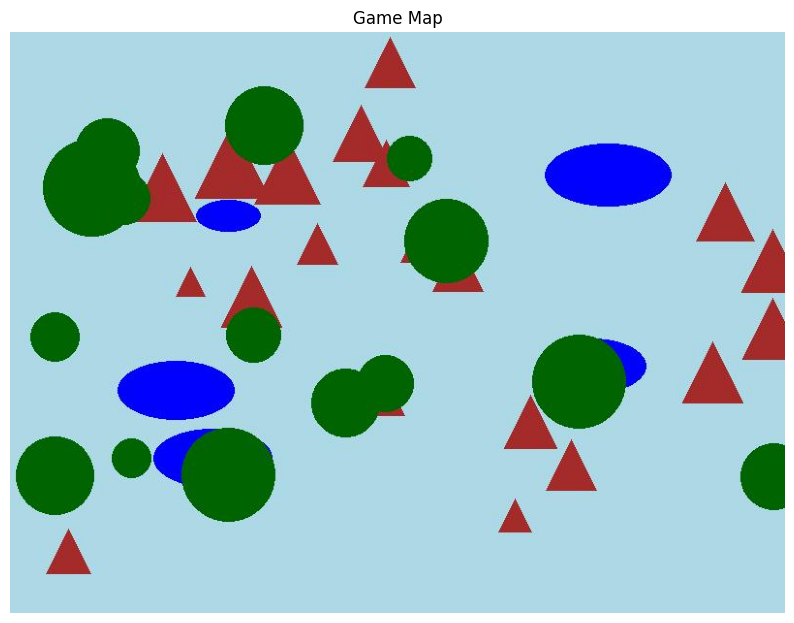

In [6]:
# Create a map (replace with your actual image path)
map_path = "map_image.jpg"  # Update this path to your image

# If the file doesn't exist, we'll create a simple demo map
if not os.path.exists(map_path):
    # Create a simple colored rectangle as a demonstration map
    demo_map = Image.new('RGB', (800, 600), color='lightblue')
    
    # Add some simple terrain features
    draw = ImageDraw.Draw(demo_map)
    
    # Add some "mountains"
    for _ in range(20):
        x = random.randint(0, 800)
        y = random.randint(0, 600)
        size = random.randint(30, 80)
        draw.polygon([(x, y), (x-size//2, y+size), (x+size//2, y+size)], fill='brown')
    
    # Add some "water"
    for _ in range(5):
        x = random.randint(100, 700)
        y = random.randint(100, 500)
        size = random.randint(50, 150)
        draw.ellipse((x-size//2, y-size//4, x+size//2, y+size//4), fill='blue')
    
    # Add some "forests"
    for _ in range(15):
        x = random.randint(0, 800)
        y = random.randint(0, 600)
        size = random.randint(40, 100)
        draw.ellipse((x-size//2, y-size//2, x+size//2, y+size//2), fill='darkgreen')
    
    # Save the demo map
    map_path = "demo_map.jpg"
    demo_map.save(map_path)

# Now create our map
game_map = GameMap(map_path)
game_map.display()

## 4. The Marker Class

Now, let's create a class to represent our movable marker. This class demonstrates:
- Encapsulation (bundling data and methods together)
- Object collaboration (the marker interacts with the map)
- Behavior defined by methods

In [7]:
class Marker:
    """
    The Marker class represents a movable marker on the map.
    It keeps track of its position and appearance.
    """
    
    def __init__(self, x, y, step_size=20, marker_image_path=None):
        """
        Initialize a new marker at the given position.
        
        Args:
            x: Initial X coordinate
            y: Initial Y coordinate
            step_size: Number of pixels to move in each step
            marker_image_path: Optional path to an image to use as the marker
        """
        # Store position coordinates
        self.x = x
        self.y = y
        
        # Store the step size (how far the marker moves in one step)
        self.step_size = step_size
        
        # Store the marker image path
        self.marker_image_path = marker_image_path
        self.image = None
        
        # Load the marker image if specified
        if marker_image_path and os.path.exists(marker_image_path):
            self.load_image()
        else:
            # Create a simple default marker
            self.create_default_image()
    
    def load_image(self):
        """Load the marker's image from the file."""
        try:
            # Open the image
            self.image = Image.open(self.marker_image_path)
            
            # Resize to a reasonable size for a marker (e.g., 40x40 pixels)
            self.image = self.image.resize((40, 40), Image.LANCZOS)
            
        except Exception as e:
            print(f"Error loading marker image: {e}")
            self.create_default_image()
    
    def create_default_image(self):
        """Create a default marker image (a red circle)."""
        # Create a small image with a red circle
        size = 40
        self.image = Image.new('RGBA', (size, size), (0, 0, 0, 0))  # Transparent background
        draw = ImageDraw.Draw(self.image)
        draw.ellipse((5, 5, size-5, size-5), fill='red', outline='black')
    
    def move(self, direction, game_map):
        """
        Move the marker in the specified direction if the new position is valid.
        
        Args:
            direction: String indicating direction ('up', 'down', 'left', 'right')
            game_map: GameMap object to check for valid positions
            
        Returns:
            True if the move was successful, False otherwise
        """
        # Calculate the new position based on the direction
        new_x, new_y = self.x, self.y
        
        if direction == 'up':
            new_y -= self.step_size
        elif direction == 'down':
            new_y += self.step_size
        elif direction == 'left':
            new_x -= self.step_size
        elif direction == 'right':
            new_x += self.step_size
        else:
            print(f"Unknown direction: {direction}")
            return False
        
        # Check if the new position is valid
        if game_map.is_valid_position(new_x, new_y):
            # Update the marker's position
            self.x, self.y = new_x, new_y
            return True
        else:
            print(f"Cannot move {direction} - that would be outside the map.")
            return False
    
    def get_position(self):
        """Return the current position of the marker."""
        return (self.x, self.y)

Let's create a marker and test its movement functionality:

In [8]:
# Create a marker in the center of the map
center_x = game_map.width // 2
center_y = game_map.height // 2
marker = Marker(center_x, center_y)

# Let's test moving it
print(f"Starting position: ({marker.x}, {marker.y})")
marker.move('right', game_map)
print(f"After moving right: ({marker.x}, {marker.y})")
marker.move('down', game_map)
print(f"After moving down: ({marker.x}, {marker.y})")

# Let's try moving outside the map to see boundary checking
for _ in range(50):
    if not marker.move('right', game_map):
        break
print(f"After trying to move far right: ({marker.x}, {marker.y})")

Starting position: (400, 300)
After moving right: (420, 300)
After moving down: (420, 320)
Cannot move right - that would be outside the map.
After trying to move far right: (780, 320)


## 5. Bringing It All Together - The MapApp Class for Jupyter

Now we'll create a class that brings the map and marker together into an interactive application. This demonstrates:
- Composition (building complex objects by combining simpler ones)
- Delegation (having an object pass tasks to its component parts)
- UI interaction

In [9]:
class JupyterMapApp:
    """
    A version of MapApp designed to work in Jupyter notebooks.
    Uses ipywidgets and matplotlib instead of tkinter.
    """
    
    def __init__(self, map_image_path, marker_image_path=None):
        """Initialize the map application."""
        # Create the map
        self.game_map = GameMap(map_image_path)
        
        # Create the marker in the center of the map
        center_x = self.game_map.width // 2
        center_y = self.game_map.height // 2
        self.marker = Marker(center_x, center_y, marker_image_path=marker_image_path)
        
        # Create output area for the map
        self.output = Output()
        
        # Position display
        self.position_output = Output()
        
        # Create control buttons
        self.create_control_buttons()
        
        # Initial drawing of the map and marker
        self.update_display()
        self.update_position_display()
    
    def create_control_buttons(self):
        """Create buttons for controlling the marker's movement."""
        # Create movement buttons
        self.up_button = Button(description="Up", button_style='info')
        self.down_button = Button(description="Down", button_style='info')
        self.left_button = Button(description="Left", button_style='info')
        self.right_button = Button(description="Right", button_style='info')
        
        # Add button click handlers
        self.up_button.on_click(lambda b: self.move_marker('up'))
        self.down_button.on_click(lambda b: self.move_marker('down'))
        self.left_button.on_click(lambda b: self.move_marker('left'))
        self.right_button.on_click(lambda b: self.move_marker('right'))
        
        # Create a blank button for spacing in the grid
        blank_button = Button(description="", button_style='', disabled=True)
        blank_button.layout.visibility = 'hidden'
        
        # Arrange buttons in a layout
        self.button_layout = VBox([
            HBox([blank_button, self.up_button, blank_button]),
            HBox([self.left_button, blank_button, self.right_button]),
            HBox([blank_button, self.down_button, blank_button])
        ])
    
    def move_marker(self, direction):
        """Move the marker in the specified direction and update the display."""
        if self.marker.move(direction, self.game_map):
            self.update_display()
            self.update_position_display()
    
    def update_position_display(self):
        """Update the display showing the marker's current position."""
        with self.position_output:
            self.position_output.clear_output(wait=True)
            print(f"Marker position: ({self.marker.x}, {self.marker.y})")
    
    def update_display(self):
        """Redraw the map and marker."""
        with self.output:
            # Clear the output
            self.output.clear_output(wait=True)
            
            # Create a copy of the map image
            display_img = self.game_map.original_image.copy()
            
            # Scale marker position to match the original image dimensions
            # This is needed if the original image has different dimensions than our logical map
            marker_x = int(self.marker.x * self.game_map.original_width / self.game_map.width)
            marker_y = int(self.marker.y * self.game_map.original_height / self.game_map.height)
            
            # Calculate marker position for pasting
            paste_x = marker_x - self.marker.image.width // 2
            paste_y = marker_y - self.marker.image.height // 2
            
            # Paste the marker onto the map (this handles transparency if the marker has an alpha channel)
            if self.marker.image.mode == 'RGBA':
                # This is the key part - we paste the marker ON TOP OF the map image
                # The third argument is the alpha mask that ensures transparency works correctly
                display_img.paste(self.marker.image, (paste_x, paste_y), self.marker.image)
            else:
                display_img.paste(self.marker.image, (paste_x, paste_y))
            
            # Display the combined image
            plt.figure(figsize=(10, 8))
            plt.imshow(display_img)
            plt.axis('off')
            plt.title("Game Map with Marker")
            plt.show()
    
    def display(self):
        """Display the map application with controls."""
        display(VBox([self.output, self.position_output, self.button_layout]))

## 6. Let's Run Our Interactive Map!

Now let's create and run our complete map application. We'll create a simple marker image if you don't have one already:

In [ ]:
# Create a simple marker if you don't have one
marker_path = "marker.png"
if not os.path.exists(marker_path):
    marker_img = Image.new('RGBA', (40, 40), (0, 0, 0, 0))
    draw = ImageDraw.Draw(marker_img)
    draw.ellipse((5, 5, 35, 35), fill='red', outline='black')
    marker_img.save(marker_path)

# Create and display the app
app = JupyterMapApp(map_path, marker_path)
app.display()

## 7. Understanding OOP Concepts Through Our Map Application

Now let's explore the key OOP concepts demonstrated in our code:

### Classes and Objects

A **class** is like a blueprint that defines the structure and behavior of an object. In our code, `GameMap`, `Marker`, and `JupyterMapApp` are classes.

An **object** is an instance of a class. For example, we created a specific game map object when we called `GameMap(map_path)`.

```python
# This is a class definition
class GameMap:
    # Class code here...

# This creates an object (an instance of the class)
my_map = GameMap("path/to/image.jpg")
```

### Constructors

The `__init__` method is a special method called when an object is created. It initializes the object's attributes:

```python
def __init__(self, image_path, width=800, height=600):
    # Initialize attributes
    self.width = width
    self.height = height
    self.image_path = image_path
```

### Encapsulation

Encapsulation means bundling data (attributes) and methods that work on that data together in a class:

```python
class Marker:
    def __init__(self, x, y, step_size=20):
        # Data
        self.x = x
        self.y = y
        self.step_size = step_size
    
    def move(self, direction, game_map):
        # Method that works with the data
        # Calculate new position and update if valid
```

### Object Collaboration

Objects can interact with each other by passing them as arguments to methods:

```python
# The Marker's move method needs a GameMap to check if the move is valid
if marker.move('right', game_map):
    print("Moved successfully!")
```

### Composition

Building complex objects by combining simpler ones:

```python
class JupyterMapApp:
    def __init__(self, map_image_path, marker_image_path=None):
        # The app is composed of a GameMap and a Marker
        self.game_map = GameMap(map_image_path)
        self.marker = Marker(center_x, center_y, marker_image_path=marker_image_path)
```

## 8. Exercises to Try

Now that you understand the basics, try these exercises to deepen your understanding:

1. Modify the marker to move in diagonal directions (e.g., 'up-right', 'down-left').
2. Add multiple markers to the map, each with a different color.
3. Create a "Treasure" class that appears at random locations on the map.
4. Add a counter that tracks how many steps the marker has moved.
5. Implement a boundary around the edges of the map (like a wall) that the marker cannot cross.

## 9. Conclusion

Congratulations! You've built a simple but functional object-oriented program. The visual nature of this example helps make abstract OOP concepts more concrete and understandable.

Key takeaways:
- Classes are blueprints for objects
- Objects combine data (attributes) and behavior (methods)
- Objects can work together to create complex systems
- Complex objects can be built by combining simpler ones

As you continue learning, you'll discover more advanced OOP concepts like inheritance, polymorphism, and abstraction, which build on these foundations.